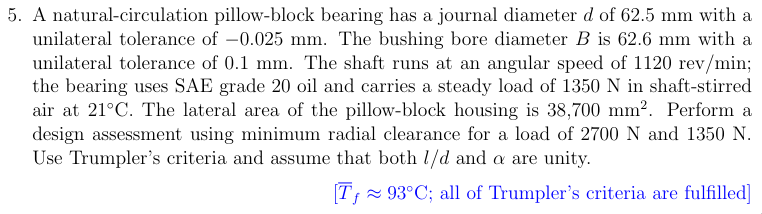

We will check the higher load of 2700 N. This automatically ensures that one of Trumpler's criteria that the design factor on running load, $n_d \geq 2$ is satisfied. 

In [1]:
dmax = 62.5e-3
bmin = 62.6e-3

cmin = (bmin - dmax)/2

r = dmax/2
rc_ratio = r/cmin 

l = dmax # since l/d = 1

alpha = 1 

N = 1120/60

W = 2700

P = W/(l*dmax)

hCR = 15.3 #for shaft-stirred air
A = 38700*(1e-3)**2  #converting from mm^2 to m^2
Tamb = 21 #This is the T_infty

Since the fluid temperature is not known, the dynamic viscosity value is also not known. 

We will have to start with guess values of the average fluid temperature, $\overline{T}_f$. 

Now, the equation which is obtained on equating $H_{\rm loss}$ with $H_{\rm gen}$ is:

\begin{gather*}
    \overline{T}_f = T_\infty + 248(1+\alpha) \frac{\mu N^2 l r^3}{h_{\rm CR} A c}
\end{gather*}

In the above equation, if we use the value of $\mu$ from the guessed value of $\overline{T}_f$, then we are not going to get back the same $\overline{T}_f$. And, so we have to iterate. 

Let us start with $\overline{T}_f = 100^\circ$C. 

The value of $\mu$ is then read from Fig. 12-3 as 5.25 mPa$\cdot$s. 

In [2]:
mu = 5.25e-3

Let's check the discrepancy in the temperature:

In [3]:
Tf_out = Tamb + 248*(1+alpha)*mu*N**2*l*r**3/(hCR*A*cmin)
display(Tf_out)

79.45641892272103

The guessed temperature was 100$^\circ$C and the value out of the equation is 79$^\circ$C. 

So, we need a higher value of $\mu$ to "pull" the computed temperature higher. Note that a higher value of $\mu$ also means that the guessed value of temperature will be lower. So, basically we are trying to bring the guessed value and the computed value closer. 

Let's try $\overline{T}_f = 88^\circ$C for which:

In [4]:
mu = 7e-3

Tf_out = Tamb + 248*(1+alpha)*mu*N**2*l*r**3/(hCR*A*cmin)
display(Tf_out)

98.94189189696137

This time, we have guessed too low. We need to "zone in" on a suitable temperature between the two earlier guessed values. 

After some hit and trial, we guess $\overline{T}_f = 92.5^\circ$C for which: 

In [5]:
mu = 6.5e-3

Tf_out = Tamb + 248*(1+alpha)*mu*N**2*l*r**3/(hCR*A*cmin)
display(Tf_out)

93.37461390432127

So, the computed temperature is quite close to 92.5$^\circ$C.

We will take $\overline{T}_f = 93^\circ$C.  

Now, we will check for Trumpler's design criteria. 

First, check for the minimum film thickness $h_0$.

\begin{gather*}
h_0 \geq 0.00508 + 0.00004 d ({\rm mm})
\end{gather*}

We will have to compute the Sommerfeld number first:

In [6]:
S = (rc_ratio)**2*(mu*N/P)
display(S)

0.06857036072530473

From Fig. 12-15, we read the value of $h_0/c$ corresponding to $S = 0.069$ and $l/d = 1$ as 0.28. 

Therefore, the value of $h_0$ is:

In [7]:
h0 = 0.28*cmin
display(h0/1e-3) #in mm

0.014000000000000403

In [8]:
0.00508 + 0.00004*(dmax/1e-3) #in mm

0.00758

Since $h_0 > 0.00758$, Trumpler's criterion for minimum film thickness is satisfied. 

Next, for temperature:

We know: $\overline{T}_f = T_s + \dfrac{\Delta T}{2}$, 

And, since: $T_{\rm max} = T_s + \Delta$, we have the following:

\begin{gather*}
T_{\rm max} = \overline{T}_f + \frac{\Delta T}{2}
\end{gather*}

So, we first need to determine $\Delta T$. This will be done using the curve fit expression given in Fig. 12-23 corresponding to $l/d = 1$. 

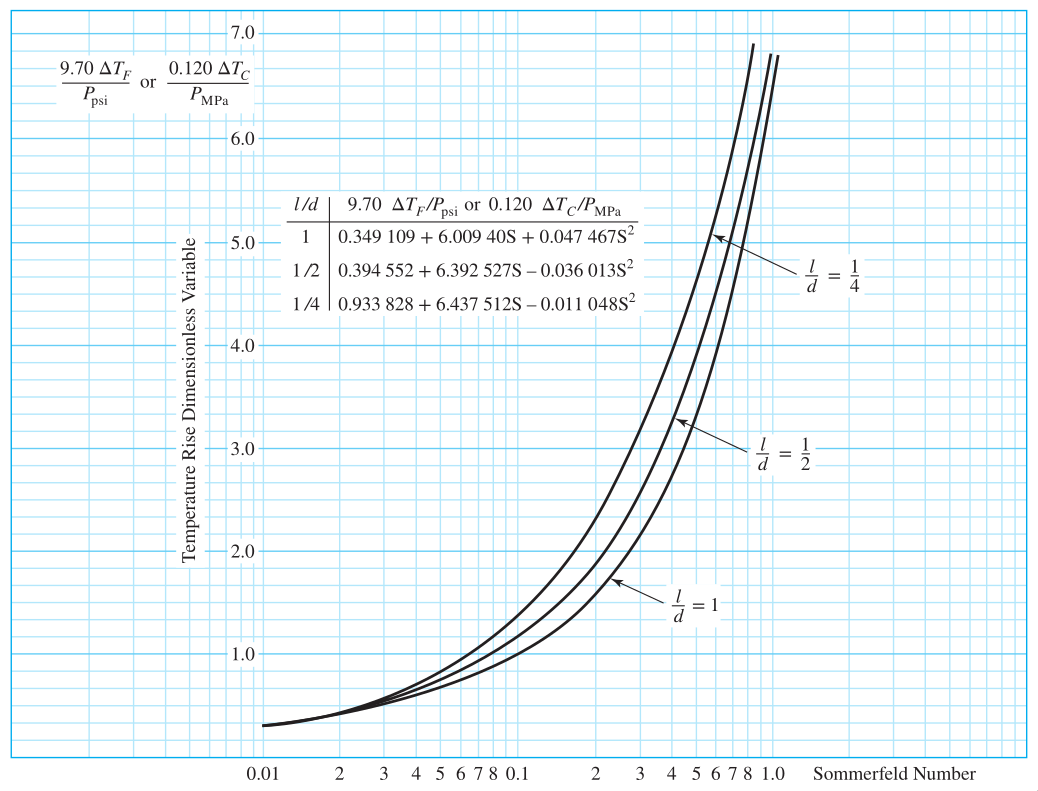

In [9]:
temp_rise_variable = 0.349109 + 6.00940*S + 0.047467*S**2

DelT = temp_rise_variable*(P/1e6)/(0.120)
display(DelT)

4.385657724841192

In [10]:
Tf = 93
Tmax = Tf + DelT/2
display(Tmax)

95.1928288624206

As per Trumpler's criteria: $T_{\rm max} \leq 121^\circ$C. Since, our computed $T_{\rm max} = 95^\circ$C, it is acceptable. 

Finally, we calculate $\dfrac{W}{l D}$:

In [11]:
D = bmin
W/(l*D)

690095.8466453673

As per Trumpler's criteria: $\dfrac{W}{l D} \leq 2068$ kPa. Since our computed value $\dfrac{W}{lD} = 69$ kPA, it is acceptable. 